In [56]:
import pandas as pd
import numpy as np
import os
import csv

In [2]:
 %config IPCompleter.greedy=True

In [15]:
miPath = "C:/Users/User/Documents/Udemy-Cursos/DataScience-Python/python-ml-course/datasets"
miArchivo ="C:/Users/User/Documents/Udemy-Cursos/DataScience-Python/python-ml-course/datasets/titanic/titanic3.csv"
miArchivo2 ="/titanic/titanic3.xlsx"

In [86]:
genero = ["Hombre", "Mujer"]
nivel = ["Bajos", "Medio", "Alto"]

In [89]:
n = 500 
genero_data = []
nivel_data = []

for i in range(0,500):
    genero_data.append(np.random.choice(genero))
    nivel_data.append(np.random.choice(nivel))

In [90]:
genero_data[1:10]

['Mujer',
 'Hombre',
 'Mujer',
 'Hombre',
 'Hombre',
 'Mujer',
 'Mujer',
 'Mujer',
 'Hombre']

In [91]:
nivel_data[0:10]

['Medio',
 'Alto',
 'Alto',
 'Bajos',
 'Medio',
 'Medio',
 'Bajos',
 'Alto',
 'Bajos',
 'Bajos']

In [95]:
altura = 160 + 30 * np.random.randn(n)
peso = 65 + 25 * np.random.randn(n)
edad =  30  + 12 * np.random.randn(n)
ingresos = 18000 + 3500 * np.random.randn(n)
len(altura)

500

In [97]:
data2 = pd.DataFrame (
    {
        "Genero": genero_data,
        "Nivel": nivel_data,
        "Altura": altura,
        "Edad": edad,
        "Ingresos": ingresos 
}
)

In [98]:
data2.head()

,Genero,Nivel,Altura,Edad,Ingresos
0,Hombre,Medio,151.566725,40.741903,12922.048858
1,Mujer,Alto,207.455534,27.112931,20522.393948
2,Hombre,Alto,174.162085,2.209027,18559.585957
3,Mujer,Bajos,178.293837,8.043942,16198.017091
4,Hombre,Medio,180.046245,18.661874,19125.225108


In [ ]:
titanic = pd.read_csv(miArchivo)

In [19]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [21]:
titanic.groupby('sex')

In [22]:
grupo = titanic.groupby('sex')

In [24]:
grupo.groups

{'female': Int64Index([   0,    2,    4,    6,    8,   11,   12,   13,   17,   18,
             ...
             1265, 1267, 1273, 1276, 1279, 1286, 1290, 1300, 1304, 1305],
            dtype='int64', length=466),
 'male': Int64Index([   1,    3,    5,    7,    9,   10,   14,   15,   16,   19,
             ...
             1296, 1297, 1298, 1299, 1301, 1302, 1303, 1306, 1307, 1308],
            dtype='int64', length=843)}

In [27]:
for names, groups in grupo:
    print(names)
    print(groups)

female
      pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
2          1         0                     Allison, Miss. Helen Loraine   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
6          1         1                Andrews, Miss. Kornelia Theodosia   
8          1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)   
...      ...       ...                                              ...   
1286       3         1  Whabee, Mrs. George Joseph (Shawneene Abi-Saab)   
1290       3         1                 Wilkes, Mrs. James (Ellen Needs)   
1300       3         1          Yasbeck, Mrs. Antoni (Selini Alexander)   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   

         sex   age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  2

In [29]:
grupo.get_group('female')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,3,1,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",female,38.0,0,0,2688,7.2292,NaN,C,C,NaN,NaN
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN


In [30]:
titanic.columns.values.tolist()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [41]:
doble_group = titanic.groupby(['sex', 'sibsp'])

In [42]:
len(doble_group)

14

In [43]:
doble_group.sum()

pclass  survived         age  parch        fare     body
sex    sibsp                                                          
female 0         576       197   6251.5000    115  10680.6961    945.0
       1         318       120   4238.5834    121   8303.3835    388.0
       2          42        15    366.5000     18    999.8458      0.0
       3          29         5    160.0000     15   1000.2001      0.0
       4          21         2     88.0000     14    172.1875      0.0
       5           6         0     26.0000      4     93.8000      0.0
       8          12         0      0.0000      8    278.2000      0.0
male   0        1519       112  14929.9166     47  12268.3152  13865.0
       1         331        43   4457.6667    108   7235.5211   3605.0
       2          56         4    482.0000      6   1055.6584    584.0
       3          22         1    101.0000     10    426.4417      4.0
       4          45         1    105.0000     20    500.8875      0.0
       5          12         0     35.0000      8    187.6000      0.0
       8          15         0     14.5000     10    347.7500     67.0

In [45]:
doble_group.mean()

pclass  survived        age     parch       fare        body
sex    sibsp                                                                
female 0      2.198473  0.751908  29.349765  0.438931  40.766016  189.000000
       1      1.987500  0.750000  30.275596  0.756250  51.896147  129.333333
       2      2.210526  0.789474  21.558824  0.947368  52.623463         NaN
       3      2.416667  0.416667  17.777778  1.250000  83.350008         NaN
       4      3.000000  0.285714  12.571429  2.000000  24.598214         NaN
       5      3.000000  0.000000  13.000000  2.000000  46.900000         NaN
       8      3.000000  0.000000        NaN  2.000000  69.550000         NaN
male   0      2.414944  0.178060  31.631179  0.074722  19.535534  161.220930
       1      2.081761  0.270440  31.840476  0.679245  45.506422  163.863636
       2      2.434783  0.173913  25.368421  0.260870  45.898191  194.666667
       3      2.750000  0.125000  14.428571  1.250000  53.305212    4.000000
       4      3.000000  0.066667   7.000000  1.333333  33.392500         NaN
       5      3.000000  0.000000   8.750000  2.000000  46.900000         NaN
       8      3.000000  0.000000  14.500000  2.000000  69.550000   67.000000

In [46]:
doble_group.size()

sex     sibsp
female  0        262
        1        160
        2         19
        3         12
        4          7
        5          2
        8          4
male    0        629
        1        159
        2         23
        3          8
        4         15
        5          4
        8          5
dtype: int64

In [47]:
doble_group.describe()

pclass                                               survived  \
              count      mean       std  min   25%  50%  75%  max    count   
sex    sibsp                                                                 
female 0      262.0  2.198473  0.856974  1.0  1.00  2.0  3.0  3.0    262.0   
       1      160.0  1.987500  0.868654  1.0  1.00  2.0  3.0  3.0    160.0   
       2       19.0  2.210526  0.854982  1.0  1.50  2.0  3.0  3.0     19.0   
       3       12.0  2.416667  0.900337  1.0  1.75  3.0  3.0  3.0     12.0   
       4        7.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      7.0   
       5        2.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      2.0   
       8        4.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      4.0   
male   0      629.0  2.414944  0.796788  1.0  2.00  3.0  3.0  3.0    629.0   
       1      159.0  2.081761  0.856609  1.0  1.00  2.0  3.0  3.0    159.0   
       2       23.0  2.434783  0.727767  1.0  2.00  3.0  3.0  3.0     23.0   
       3        8.0  2.750000  0.707107  1.0  3.00  3.0  3.0  3.0      8.0   
       4       15.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0     15.0   
       5        4.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      4.0   
       8        5.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      5.0   

                        ...       fare            body              \
                  mean  ...        75%       max count        mean   
sex    sibsp            ...                                          
female 0      0.751908  ...  35.812500  512.3292   5.0  189.000000   
       1      0.750000  ...  72.274975  263.0000   3.0  129.333333   
       2      0.789474  ...  39.000000  262.3750   0.0         NaN   
       3      0.416667  ...  86.675000  263.0000   0.0         NaN   
       4      0.285714  ...  31.275000   31.3875   0.0         NaN   
       5      0.000000  ...  46.900000   46.9000   0.0         NaN   
       8      0.000000  ...  69.550000   69.5500   0.0         NaN   
male   0      0.178060  ...  15.200000  512.3292  86.0  161.220930   
       1      0.270440  ...  56.964600  263.0000  22.0  163.863636   
       2      0.173913  ...  56.250000  262.3750   3.0  194.666667   
       3      0.125000  ...  27.900000  263.0000   1.0    4.000000   
       4      0.066667  ...  39.687500   39.6875   0.0         NaN   
       5      0.000000  ...  46.900000   46.9000   0.0         NaN   
       8      0.000000  ...  69.550000   69.5500   1.0   67.000000   

                                                             
                     std   min     25%    50%    75%    max  
sex    sibsp                                                 
female 0      129.021316  52.0   61.00  206.0  299.0  327.0  
       1      173.580913   7.0   30.00   53.0  190.5  328.0  
       2             NaN   NaN     NaN    NaN    NaN    NaN  
       3             NaN   NaN     NaN    NaN    NaN    NaN  
       4             NaN   NaN     NaN    NaN    NaN    NaN  
       5             NaN   NaN     NaN    NaN    NaN    NaN  
       8             NaN   NaN     NaN    NaN    NaN    NaN  
male   0       93.117687   9.0   79.25  160.5  248.0  322.0  
       1      103.081242   1.0   97.25  138.5  279.5  314.0  
       2       84.719144  98.0  164.00  230.0  243.0  256.0  
       3             NaN   4.0    4.00    4.0    4.0    4.0  
       4             NaN   NaN     NaN    NaN    NaN    NaN  
       5             NaN   NaN     NaN    NaN    NaN    NaN  
       8             NaN  67.0   67.00   67.0   67.0   67.0  

[14 rows x 48 columns]

In [49]:
fare = doble_group['fare']

In [51]:
fare.describe()

count       mean         std      min       25%       50%  \
sex    sibsp                                                              
female 0      262.0  40.766016   67.109938   6.7500   7.87920  13.00000   
       1      160.0  51.896147   51.452272   7.0000  16.55000  27.75000   
       2       19.0  52.623463   74.771613   8.6625  19.25830  25.70000   
       3       12.0  83.350008  108.386231  15.8500  21.07500  25.46670   
       4        7.0  24.598214   11.441364   7.7750  19.60000  31.27500   
       5        2.0  46.900000    0.000000  46.9000  46.90000  46.90000   
       8        4.0  69.550000    0.000000  69.5500  69.55000  69.55000   
male   0      628.0  19.535534   38.036554   0.0000   7.77500   8.05000   
       1      159.0  45.506422   48.731473   6.4375  15.64585  26.00000   
       2       23.0  45.898191   56.921701   7.9250  16.05415  24.15000   
       3        8.0  53.305212   84.802476  18.0000  21.07500  23.74585   
       4       15.0  33.392500    4.703774  29.1250  29.12500  31.38750   
       5        4.0  46.900000    0.000000  46.9000  46.90000  46.90000   
       8        5.0  69.550000    0.000000  69.5500  69.55000  69.55000   

                    75%       max  
sex    sibsp                       
female 0      35.812500  512.3292  
       1      72.274975  263.0000  
       2      39.000000  262.3750  
       3      86.675000  263.0000  
       4      31.275000   31.3875  
       5      46.900000   46.9000  
       8      69.550000   69.5500  
male   0      15.200000  512.3292  
       1      56.964600  263.0000  
       2      56.250000  262.3750  
       3      27.900000  263.0000  
       4      39.687500   39.6875  
       5      46.900000   46.9000  
       8      69.550000   69.5500

In [57]:
doble_group.aggregate (
    {
        "pclass": np.sum,
        "age": np.mean,
        "fare": np.std
    }
)

pclass        age        fare
sex    sibsp                               
female 0         576  29.349765   67.109938
       1         318  30.275596   51.452272
       2          42  21.558824   74.771613
       3          29  17.777778  108.386231
       4          21  12.571429   11.441364
       5           6  13.000000    0.000000
       8          12        NaN    0.000000
male   0        1519  31.631179   38.036554
       1         331  31.840476   48.731473
       2          56  25.368421   56.921701
       3          22  14.428571   84.802476
       4          45   7.000000    4.703774
       5          12   8.750000    0.000000
       8          15  14.500000    0.000000

In [62]:
doble_group.aggregate(
{
    "pclass": np.mean,
    "age": lambda h:np.mean(h)+np.std(h)
}
)

pclass        age
sex    sibsp                     
female 0      2.198473  42.166401
       1      1.987500  46.132654
       2      2.210526  39.126870
       3      2.416667  29.284083
       4      3.000000  23.870697
       5      3.000000  16.000000
       8      3.000000        NaN
male   0      2.414944  44.723749
       1      2.081761  47.836695
       2      2.434783  36.617798
       3      2.750000  25.523707
       4      3.000000  11.501851
       5      3.000000  13.565340
       8      3.000000  14.500000

In [66]:
doble_group.aggregate([(np.sum), np.mean, np.std])

pclass                     survived                      \
                sum      mean       std      sum      mean       std   
sex    sibsp                                                           
female 0        576  2.198473  0.856974      197  0.751908  0.432732   
       1        318  1.987500  0.868654      120  0.750000  0.434372   
       2         42  2.210526  0.854982       15  0.789474  0.418854   
       3         29  2.416667  0.900337        5  0.416667  0.514929   
       4         21  3.000000  0.000000        2  0.285714  0.487950   
       5          6  3.000000  0.000000        0  0.000000  0.000000   
       8         12  3.000000  0.000000        0  0.000000  0.000000   
male   0       1519  2.414944  0.796788      112  0.178060  0.382868   
       1        331  2.081761  0.856609       43  0.270440  0.445591   
       2         56  2.434783  0.727767        4  0.173913  0.387553   
       3         22  2.750000  0.707107        1  0.125000  0.353553   
       4         45  3.000000  0.000000        1  0.066667  0.258199   
       5         12  3.000000  0.000000        0  0.000000  0.000000   
       8         15  3.000000  0.000000        0  0.000000  0.000000   

                     age                       parch                      \
                     sum       mean        std   sum      mean       std   
sex    sibsp                                                               
female 0       6251.5000  29.349765  12.846828   115  0.438931  0.872138   
       1       4238.5834  30.275596  15.913996   121  0.756250  1.252654   
       2        366.5000  21.558824  18.108727    18  0.947368  0.911268   
       3        160.0000  17.777778  12.204280    15  1.250000  0.753778   
       4         88.0000  12.571429  12.204605    14  2.000000  0.000000   
       5         26.0000  13.000000   4.242641     4  2.000000  0.000000   
       8          0.0000        NaN        NaN     8  2.000000  0.000000   
male   0      14929.9166  31.631179  13.106461    47  0.074722  0.337394   
       1       4457.6667  31.840476  16.053656   108  0.679245  1.218636   
       2        482.0000  25.368421  11.557636     6  0.260870  0.619192   
       3        101.0000  14.428571  11.984116    10  1.250000  0.707107   
       4        105.0000   7.000000   4.659859    20  1.333333  0.487950   
       5         35.0000   8.750000   5.560276     8  2.000000  0.000000   
       8         14.5000  14.500000        NaN    10  2.000000  0.000000   

                    fare                            body              \
                     sum       mean         std      sum        mean   
sex    sibsp                                                           
female 0      10680.6961  40.766016   67.109938    945.0  189.000000   
       1       8303.3835  51.896147   51.452272    388.0  129.333333   
       2        999.8458  52.623463   74.771613      0.0         NaN   
       3       1000.2001  83.350008  108.386231      0.0         NaN   
       4        172.1875  24.598214   11.441364      0.0         NaN   
       5         93.8000  46.900000    0.000000      0.0         NaN   
       8        278.2000  69.550000    0.000000      0.0         NaN   
male   0      12268.3152  19.535534   38.036554  13865.0  161.220930   
       1       7235.5211  45.506422   48.731473   3605.0  163.863636   
       2       1055.6584  45.898191   56.921701    584.0  194.666667   
       3        426.4417  53.305212   84.802476      4.0    4.000000   
       4        500.8875  33.392500    4.703774      0.0         NaN   
       5        187.6000  46.900000    0.000000      0.0         NaN   
       8        347.7500  69.550000    0.000000     67.0   67.000000   

                          
                     std  
sex    sibsp              
female 0      129.021316  
       1      173.580913  
       2             NaN  
       3             NaN  
       4             NaN  
       5             NaN  
       8             NaN  


In [68]:
doble_group.aggregate([lambda x:np.mean(x) / np.std(x)])

C:\Users\User\anaconda3\envs\DataScience-Phtyon-Udemy\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\User\anaconda3\envs\DataScience-Phtyon-Udemy\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


pclass  survived       age     parch      fare      body
              <lambda>  <lambda>  <lambda>  <lambda>  <lambda>  <lambda>
sex    sibsp                                                            
female 0      2.570302  1.740910  2.289974  0.504245  0.608614  1.637779
       1      2.295206  1.732051  1.909282  0.605613  1.011794  0.912545
       2      2.656313  1.936492  1.227161  1.068103  0.723075       NaN
       3      2.803536  0.845154  1.545047  1.732051  0.803204       NaN
       4           inf  0.632456  1.112588       inf  2.322198       NaN
       5           inf       NaN  4.333333       inf       inf       NaN
       8           inf       NaN       NaN       inf       inf       NaN
male   0      3.033260  0.465440  2.415964  0.221644  0.514008  1.741522
       1      2.437913  0.608843  1.990500  0.559143  0.936770  1.627064
       2      3.420744  0.458831  2.255096  0.430775  0.824461  2.814205
       3      4.157609  0.377964  1.300441  1.889822  0.671981       inf
       4           inf  0.267261  1.554916  2.828427  7.348254       NaN
       5           inf       NaN  1.817109       inf       inf       NaN
       8           inf       NaN       inf       inf       inf       inf

#### Filtrado de datos

In [69]:
doble_group.describe()

pclass                                               survived  \
              count      mean       std  min   25%  50%  75%  max    count   
sex    sibsp                                                                 
female 0      262.0  2.198473  0.856974  1.0  1.00  2.0  3.0  3.0    262.0   
       1      160.0  1.987500  0.868654  1.0  1.00  2.0  3.0  3.0    160.0   
       2       19.0  2.210526  0.854982  1.0  1.50  2.0  3.0  3.0     19.0   
       3       12.0  2.416667  0.900337  1.0  1.75  3.0  3.0  3.0     12.0   
       4        7.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      7.0   
       5        2.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      2.0   
       8        4.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      4.0   
male   0      629.0  2.414944  0.796788  1.0  2.00  3.0  3.0  3.0    629.0   
       1      159.0  2.081761  0.856609  1.0  1.00  2.0  3.0  3.0    159.0   
       2       23.0  2.434783  0.727767  1.0  2.00  3.0  3.0  3.0     23.0   
       3        8.0  2.750000  0.707107  1.0  3.00  3.0  3.0  3.0      8.0   
       4       15.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0     15.0   
       5        4.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      4.0   
       8        5.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      5.0   

                        ...       fare            body              \
                  mean  ...        75%       max count        mean   
sex    sibsp            ...                                          
female 0      0.751908  ...  35.812500  512.3292   5.0  189.000000   
       1      0.750000  ...  72.274975  263.0000   3.0  129.333333   
       2      0.789474  ...  39.000000  262.3750   0.0         NaN   
       3      0.416667  ...  86.675000  263.0000   0.0         NaN   
       4      0.285714  ...  31.275000   31.3875   0.0         NaN   
       5      0.000000  ...  46.900000   46.9000   0.0         NaN   
       8      0.000000  ...  69.550000   69.5500   0.0         NaN   
male   0      0.178060  ...  15.200000  512.3292  86.0  161.220930   
       1      0.270440  ...  56.964600  263.0000  22.0  163.863636   
       2      0.173913  ...  56.250000  262.3750   3.0  194.666667   
       3      0.125000  ...  27.900000  263.0000   1.0    4.000000   
       4      0.066667  ...  39.687500   39.6875   0.0         NaN   
       5      0.000000  ...  46.900000   46.9000   0.0         NaN   
       8      0.000000  ...  69.550000   69.5500   1.0   67.000000   

                                                             
                     std   min     25%    50%    75%    max  
sex    sibsp                                                 
female 0      129.021316  52.0   61.00  206.0  299.0  327.0  
       1      173.580913   7.0   30.00   53.0  190.5  328.0  
       2             NaN   NaN     NaN    NaN    NaN    NaN  
       3             NaN   NaN     NaN    NaN    NaN    NaN  
       4             NaN   NaN     NaN    NaN    NaN    NaN  
       5             NaN   NaN     NaN    NaN    NaN    NaN  
       8             NaN   NaN     NaN    NaN    NaN    NaN  
male   0       93.117687   9.0   79.25  160.5  248.0  322.0  
       1      103.081242   1.0   97.25  138.5  279.5  314.0  
       2       84.719144  98.0  164.00  230.0  243.0  256.0  
       3             NaN   4.0    4.00    4.0    4.0    4.0  
       4             NaN   NaN     NaN    NaN    NaN    NaN  
       5             NaN   NaN     NaN    NaN    NaN    NaN  
       8             NaN  67.0   67.00   67.0   67.0   67.0  

[14 rows x 48 columns]

In [70]:
doble_group["age"].filter(lambda x:x.sum()>200)

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1252, dtype: float64

##### Transformacion de variables  

In [71]:
zscore = lambda x: (x - x.mean())/x.std()

In [74]:
z_group = doble_group.transform(zscore)

In [73]:
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\envs\DataScience-Phtyon-Udemy\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\DataScience-Phtyon-Udemy\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 33.,  43., 257., 275., 193., 128.,  60.,  42.,  12.,   2.]),
 array([-2.38797339, -1.78013041, -1.17228744, -0.56444447,  0.0433985 ,
         0.65124147,  1.25908445,  1.86692742,  2.47477039,  3.08261336,
         3.69045633]),
 <a list of 10 Patch objects>)

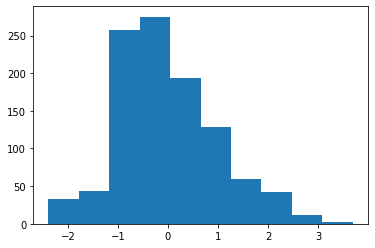

In [76]:
plt.hist(z_group['age'])

In [77]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [78]:
doble_group.transform(fill_na_mean) 

,pclass,survived,age,parch,fare,body
0,1,1,29.000000,0,211.3375,189.000000
1,1,1,0.916700,2,151.5500,163.863636
2,1,0,2.000000,2,151.5500,129.333333
3,1,0,30.000000,2,151.5500,135.000000
4,1,0,25.000000,2,151.5500,129.333333
...,...,...,...,...,...,...
1304,3,0,14.500000,0,14.4542,328.000000
1305,3,0,30.275596,0,14.4542,129.333333
1306,3,0,26.500000,0,7.2250,304.000000
1307,3,0,27.000000,0,7.2250,161.220930


##### Operaciones diversas muy utiles

In [80]:
doble_group.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0000,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
114,1,0,"Fortune, Mr. Charles Alexander",male,19.0000,3,2,19950,263.0000,C23 C25 C27,S,NaN,NaN,"Winnipeg, MB"
119,1,1,"Frauenthal, Dr. Henry William",male,50.0000,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY"
622,3,0,"Andersson, Master. Sigvard Harald Elias",male,4.0000,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"
623,3,0,"Andersson, Miss. Ebba Iris Alfrida",female,6.0000,4,2,347082,31.2750,NaN,S,NaN,NaN,"Sweden Winnipeg, MN"


In [82]:
doble_group.tail(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
643,3,1,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,S,15,NaN,"Sweden Worcester, MA"
829,3,0,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
830,3,0,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY"
1145,3,0,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q,NaN,NaN,NaN
1175,3,0,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1178,3,0,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN
1209,3,0,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN
1273,3,0,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN
1274,3,0,"Vander Planke, Mr. Julius",male,31.0,3,0,345763,18.0000,NaN,S,NaN,NaN,NaN
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN


In [83]:
doble_group.nth(32)

pclass  survived  \
sex    sibsp                     
female 0           1         1   
       1           1         1   
male   0           1         1   
       1           1         0   

                                                           name   age  parch  \
sex    sibsp                                                                   
female 0                                   Geiger, Miss. Amalie  35.0      0   
       1      Holverson, Mrs. Alexander Oskar (Mary Aline To...  35.0      0   
male   0                              Dodge, Master. Washington   4.0      2   
       1                              Marvin, Mr. Daniel Warner  19.0      0   

              ticket      fare cabin embarked boat  body          home.dest  
sex    sibsp                                                                 
female 0      113503  211.5000  C130        C    4   NaN                NaN  
       1      113789   52.0000   NaN        S    8   NaN       New York, NY  
male   0       33638   81.8583   A34        S    5   NaN  San Francisco, CA  
       1      113773   53.1000   D30        S  NaN   NaN       New York, NY

In [84]:
data_sorted = titanic.sort_values(["age", "pclass"])

In [85]:
data_sorted.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.1667,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.3333,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN
427,2,1,"Hamalainen, Master. Viljo",male,0.6667,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
657,3,1,"Baclini, Miss. Eugenie",female,0.7500,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.7500,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
1111,3,0,"Peacock, Master. Alfred Edward",male,0.7500,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN
359,2,1,"Caldwell, Master. Alden Gates",male,0.8333,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
548,2,1,"Richards, Master. George Sibley",male,0.8333,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
611,3,1,"Aks, Master. Philip Frank",male,0.8333,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
